<a href="https://colab.research.google.com/github/AntonioWanderer/CompPhys22/blob/main/Progonka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

In [134]:
def f(x):
    return cos(x)

In [135]:
def Method3Diag(a, b, c, d, n):
    y = np.zeros(n+2)
    #forward
    for i in range(1, n+1):
        ksi = a[i]/b[i-1]
        a[i] = 0
        b[i] -= ksi * c[i-1]
        d[i] -= ksi * d[i-1]    
    
    #back
    y[n-1] = d[i] / b[i]
    
    for i in range(n-2, -1, -1):
        y[i] = 1/b[i] * (d[i] - c[i]*y[i+1])
    
    return y

In [136]:
prec = 1e-4
xStart = - pi/2
xStop = pi/2 
#!!!
#A1*y0 + B1*y0' = C1
#A2*yn + B2*yn' = C2
A1 = 0
B1 = 0
C1 = 0
A2 = 0
B2 = 0
C2 = 0

In [137]:
def Solving(deg):
  n = 2**deg

  x = np.linspace(xStart, xStop, n+2, True)

  #3-diagonal matrix preparing 
  a = np.ones(n+2) 
  a[0] = 0
  b = -2 * np.ones(n+2)
  c = np.ones(n+2)
  c[-1] = 0

  h = x[1] - x[0] #step length

  d = np.array(list(map(f,x))) * h**2

  b[0] = A1 - B1 / h
  c[0] = B1 / h
  d[0] = C1
  a[n-1] += A2 - B2 / h
  b[n] += B2 / h
  d[n] += C2

  y = Method3Diag(a, b, c, d, n)
  return h, x, y

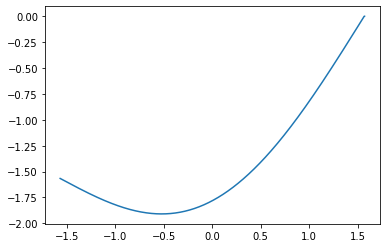

-1.5661964483700264 -0.49999999999996375
0.0 0.0


In [138]:
h, x, y = Solving(10)

analyth = -np.cos(x)

plt.plot(x, y)
plt.show()

#boundaries checking
print(y[0] ,  (y[1] - y[0])/h)
print(y[-1] ,  (y[-1] - y[-2])/h)

In [139]:
deg = 0

while True:
  deg += 1
  print(deg)
  h, x, y = Solving(deg)
  if deg > 1:
    diff = [abs(y[2*i] - y1[i]) for i in range(len(y1))]
    print(max(diff))
    if max(diff) <= prec / 3:
      break
  y1 = y

print(h, "step")

analyth = - np.cos(x)
plt.plot(x, -analyth + y)
plt.show()

1
2


IndexError: ignored